# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     854.8
Date:                Mon, 08 Sep 2025   Prob (F-statistic):           2.49e-40
Time:                        13:54:59   Log-Likelihood:               -0.57092
No. Observations:                  50   AIC:                             9.142
Df Residuals:                      46   BIC:                             16.79
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9620      0.087     57.053      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.4391466   4.95916025  5.43403294  5.83186392  6.13226527  6.32971155
  6.43444763  6.47080546  6.47320642  6.480506    6.52960991  6.64941061
  6.85604036  7.15022071  7.51714398  7.9289061   8.34909118  8.73875454
  9.0628212   9.29584861  9.42620677  9.45798905  9.4103396   9.31430808
  9.20774823  9.12909867  9.11106749  9.17525843  9.32862146  9.56231087
  9.85313864 10.16738417 10.46633444 10.71264448 10.87647303 10.94038538
 10.90221785 10.77543326 10.58690904 10.37252134 10.17125068 10.01877756
  9.94162025  9.95277793 10.04959494 10.21419713 10.41642848 10.61880569
 10.78267658 10.87457052]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.85682305 10.68575998 10.38433628 10.00486346  9.61620185  9.28690119
  9.06841729  8.98251385  9.01593392  9.12364569]


## Plot comparison

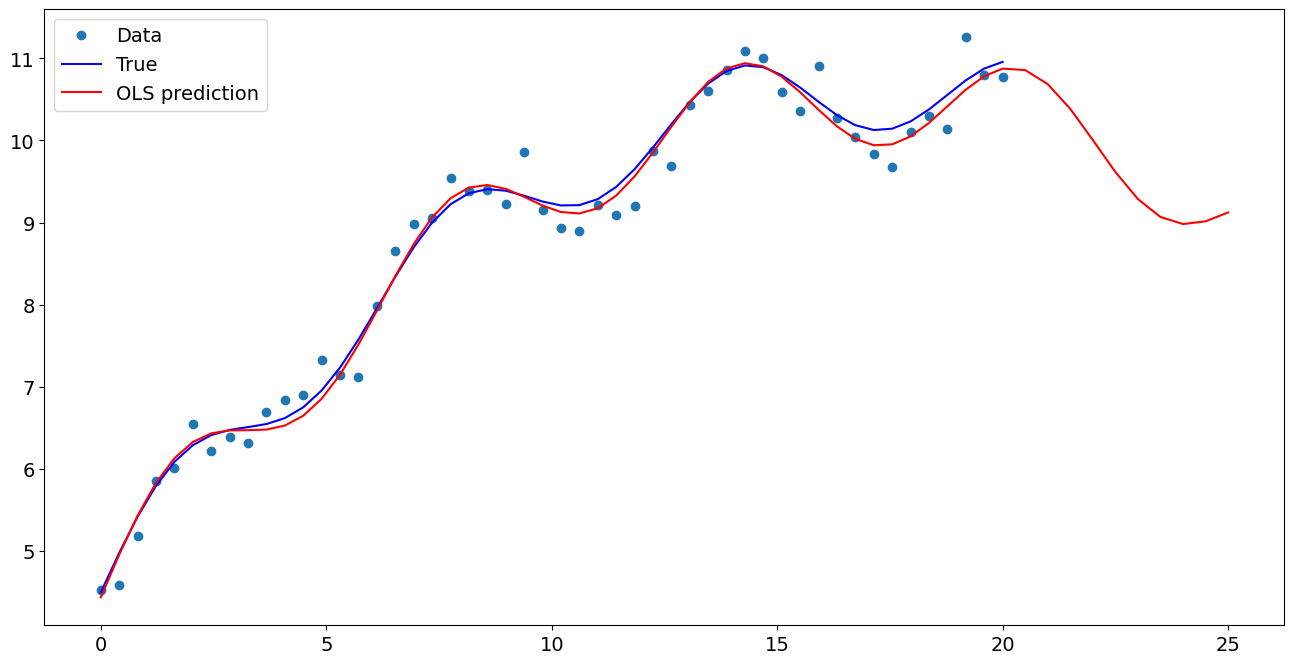

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.962012
x1                  0.504198
np.sin(x1)          0.585344
I((x1 - 5) ** 2)   -0.020915
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.856823
1    10.685760
2    10.384336
3    10.004863
4     9.616202
5     9.286901
6     9.068417
7     8.982514
8     9.015934
9     9.123646
dtype: float64